In [1]:
import requests as r
import pandas as pd

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## start here!
## add eigenvectors to the network

eigenvalues_data = {}

datasets = [
    'final-homes-eigs-chicago-S000', 
    'final-homes-eigs-chicago-SA01', 
    'final-homes-eigs-chicago-SA02', 
    'final-homes-eigs-chicago-SA03', 
    'final-homes-eigs-chicago-SE01', 
    'final-homes-eigs-chicago-SE02', 
    'final-homes-eigs-chicago-SE03'
]

for dataset in datasets:
    for year in range(14):
        if dataset not in eigenvalues_data:
            eigenvalues_data[dataset] = {}
        
        year = year + 2002
        
        res = r.get('http://chicago.bnroths.com/data/%s/%s/1.json' % (dataset, year)).json()
        
        for a in res['data']:
            if a not in eigenvalues_data[dataset]:
                eigenvalues_data[dataset][a] = []
            eigenvalues_data[dataset][a].append(res['data'][a]['real'])

corrMatrix = pd.DataFrame()
print corrMatrix
for dataset in eigenvalues_data:
    for hood in sorted(eigenvalues_data[dataset]):   
        # print data[hood]
        # print data[hood]
        for i in range(len(eigenvalues_data[dataset][hood])):
            row = '%s-%s' % (hood, i)
            if i == 0:
                corrMatrix.at[row, dataset] = 0
            else:
                corrMatrix.at[row, dataset] = eigenvalues_data[dataset][hood][i] - eigenvalues_data[dataset][hood][i-1]
        
            
            
            


Empty DataFrame
Columns: []
Index: []


In [3]:
corrMatrix

,final-homes-eigs-chicago-SA01,final-homes-eigs-chicago-SA03,final-homes-eigs-chicago-SA02,final-homes-eigs-chicago-SE01,final-homes-eigs-chicago-SE03,final-homes-eigs-chicago-SE02,final-homes-eigs-chicago-S000
Albany Park-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albany Park-1,16.2,8.3,3.3,24.6,1.7,-14.3,6.0
Albany Park-2,-24.1,-4.5,-197.3,0.0,5.3,3.9,0.0
Albany Park-3,-15.5,4.4,190.4,-26.0,4.9,-14.9,-15.6
Albany Park-4,2.1,-14.0,-13.5,-8.9,-6.7,-14.0,-7.0
Albany Park-5,-22.6,-31.7,-28.5,-35.1,-5.2,-23.2,-28.5
Albany Park-6,30.0,58.5,35.4,35.9,26.5,28.0,36.8
Albany Park-7,-37.5,-55.3,-48.9,-38.6,-47.2,-46.9,-48.0
Albany Park-8,35.0,52.8,59.2,43.8,39.8,57.8,53.1
Albany Park-9,24.4,5.2,7.6,15.4,26.2,7.1,11.8


In [7]:
files = [
    'Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv', 
    'Neighborhood_Zri_AllHomesPlusMultifamily.csv',
    'Neighborhood_Zhvi_AllHomes.csv', 
]

def normal(row):
    if row.name == 'RegionName':
        return row
    else:
        return row.divide(sum(row.fillna(0))/len(row))

def sub(row):
    print row.append(pd.series([0, 1, 2]))
    return row.subtract(row)

for filename in files:
    print filename
    zillow = pd.read_csv('zillow_data/%s' % filename)
    # print zillow.index
    ## first normalize by column average
    
    try:
        zillow = zillow[(zillow.City == 'Chicago')][[
            'RegionName',
            '2002-01',
            '2003-01',
            '2004-01',
            '2005-01',
            '2006-01',
            '2007-01',
            '2008-01',
            '2009-01',
            '2010-01',
            '2011-01',
            '2012-01',
            '2013-01',
            '2014-01',
            '2015-01']]
    except:
        # rent index starts in 2010
        zillow = zillow[(zillow.City == 'Chicago')][[
            'RegionName',
            '2011-01',
            '2012-01',
            '2013-01',
            '2014-01',
            '2015-01']]

        
    zillow = zillow.transpose().apply(normal, axis=1)
    zillow = zillow.rename(columns=zillow.iloc[0]).drop(zillow.index[:1]).transpose()
    print zillow.apply(sub, axis=1)
    for index, row in zillow.iterrows():
        rows = list(row)
        
        for i, val in enumerate(rows):
            if len(rows) == 5:
                i += 9
            row = "%s-%s" % (index, i)
            # print row, val, dataset
            corrMatrix.at[row, filename] = val
             

Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv


AttributeError: ("'module' object has no attribute 'series'", u'occurred at index Logan Square')

In [5]:
corrMatrix = corrMatrix[corrMatrix.index.str.contains("-0") == False]

In [75]:
zillow_test = pd.read_csv('zillow_data/Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv')
zillow_test[(zillow_test.RegionName == 'South Loop')][['2002-01', '2003-01']].head()

,2002-01,2003-01
220,80.79,87.8


In [8]:
corrMatrix.dropna()

,final-homes-eigs-chicago-SA01,final-homes-eigs-chicago-SA03,final-homes-eigs-chicago-SA02,final-homes-eigs-chicago-SE01,final-homes-eigs-chicago-SE03,final-homes-eigs-chicago-SE02,final-homes-eigs-chicago-S000,Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv,Neighborhood_Zhvi_AllHomes.csv
Albany Park-0,187.0,155.4,194.0,167.5,159.1,197.6,188.9,1.000000,1.000000
Albany Park-1,203.2,163.7,197.3,192.1,160.8,183.3,194.9,1.369288,1.121352
Albany Park-2,179.1,159.2,0.0,192.1,166.1,187.2,194.9,1.158024,1.162267
Albany Park-3,163.6,163.6,190.4,166.1,171.0,172.3,179.3,1.194491,1.294877
Albany Park-4,165.7,149.6,176.9,157.2,164.3,158.3,172.3,1.237575,1.388397
Albany Park-5,143.1,117.9,148.4,122.1,159.1,135.1,143.8,0.688260,1.399587
Albany Park-6,173.1,176.4,183.8,158.0,185.6,163.1,180.6,0.766272,1.410198
Albany Park-7,135.6,121.1,134.9,119.4,138.4,116.2,132.6,0.183105,1.202876
Albany Park-8,170.6,173.9,194.1,163.2,178.2,174.0,185.7,0.236498,1.004537
Albany Park-9,195.0,179.1,201.7,178.6,204.4,181.1,197.5,0.147869,0.931357


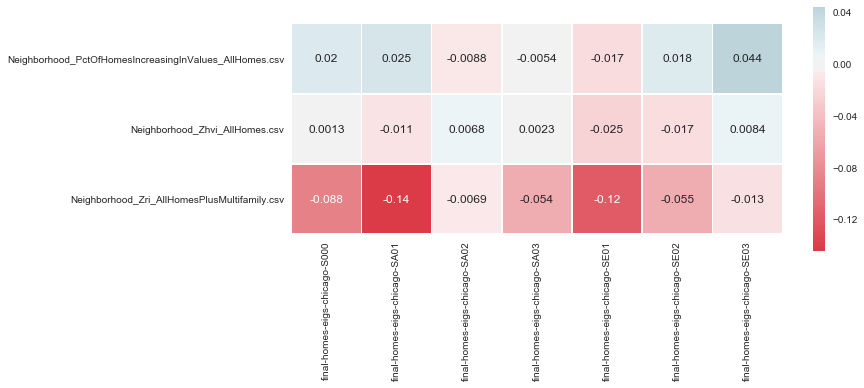

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Compute the correlation matrix
corr = corrMatrix.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
print cmap

corr_small = corr.loc[['Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv', 'Neighborhood_Zhvi_AllHomes.csv', 'Neighborhood_Zri_AllHomesPlusMultifamily.csv']][[
    'final-homes-eigs-chicago-S000', 
    'final-homes-eigs-chicago-SA01', 
    'final-homes-eigs-chicago-SA02', 
    'final-homes-eigs-chicago-SA03', 
    'final-homes-eigs-chicago-SE01', 
    'final-homes-eigs-chicago-SE02', 
    'final-homes-eigs-chicago-SE03']]
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_small, 
            #mask=mask, 
            annot=True, 
            cmap=cmap, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})


In [7]:

corr.loc[['Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv', 'Neighborhood_Zhvi_AllHomes.csv', 'Neighborhood_Zri_AllHomesPlusMultifamily.csv']][[
    'final-homes-eigs-chicago-S000', 
    'final-homes-eigs-chicago-SA01', 
    'final-homes-eigs-chicago-SA02', 
    'final-homes-eigs-chicago-SA03', 
    'final-homes-eigs-chicago-SE01', 
    'final-homes-eigs-chicago-SE02', 
    'final-homes-eigs-chicago-SE03']]

,final-homes-eigs-chicago-S000,final-homes-eigs-chicago-SA01,final-homes-eigs-chicago-SA02,final-homes-eigs-chicago-SA03,final-homes-eigs-chicago-SE01,final-homes-eigs-chicago-SE02,final-homes-eigs-chicago-SE03
Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv,0.019843,0.025323,-0.008793,-0.005398,-0.017176,0.017936,0.044227
Neighborhood_Zhvi_AllHomes.csv,0.001264,-0.011302,0.006779,0.002314,-0.024566,-0.016804,0.008358
Neighborhood_Zri_AllHomesPlusMultifamily.csv,-0.088460,-0.144651,-0.006933,-0.054476,-0.117792,-0.054995,-0.013178


/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

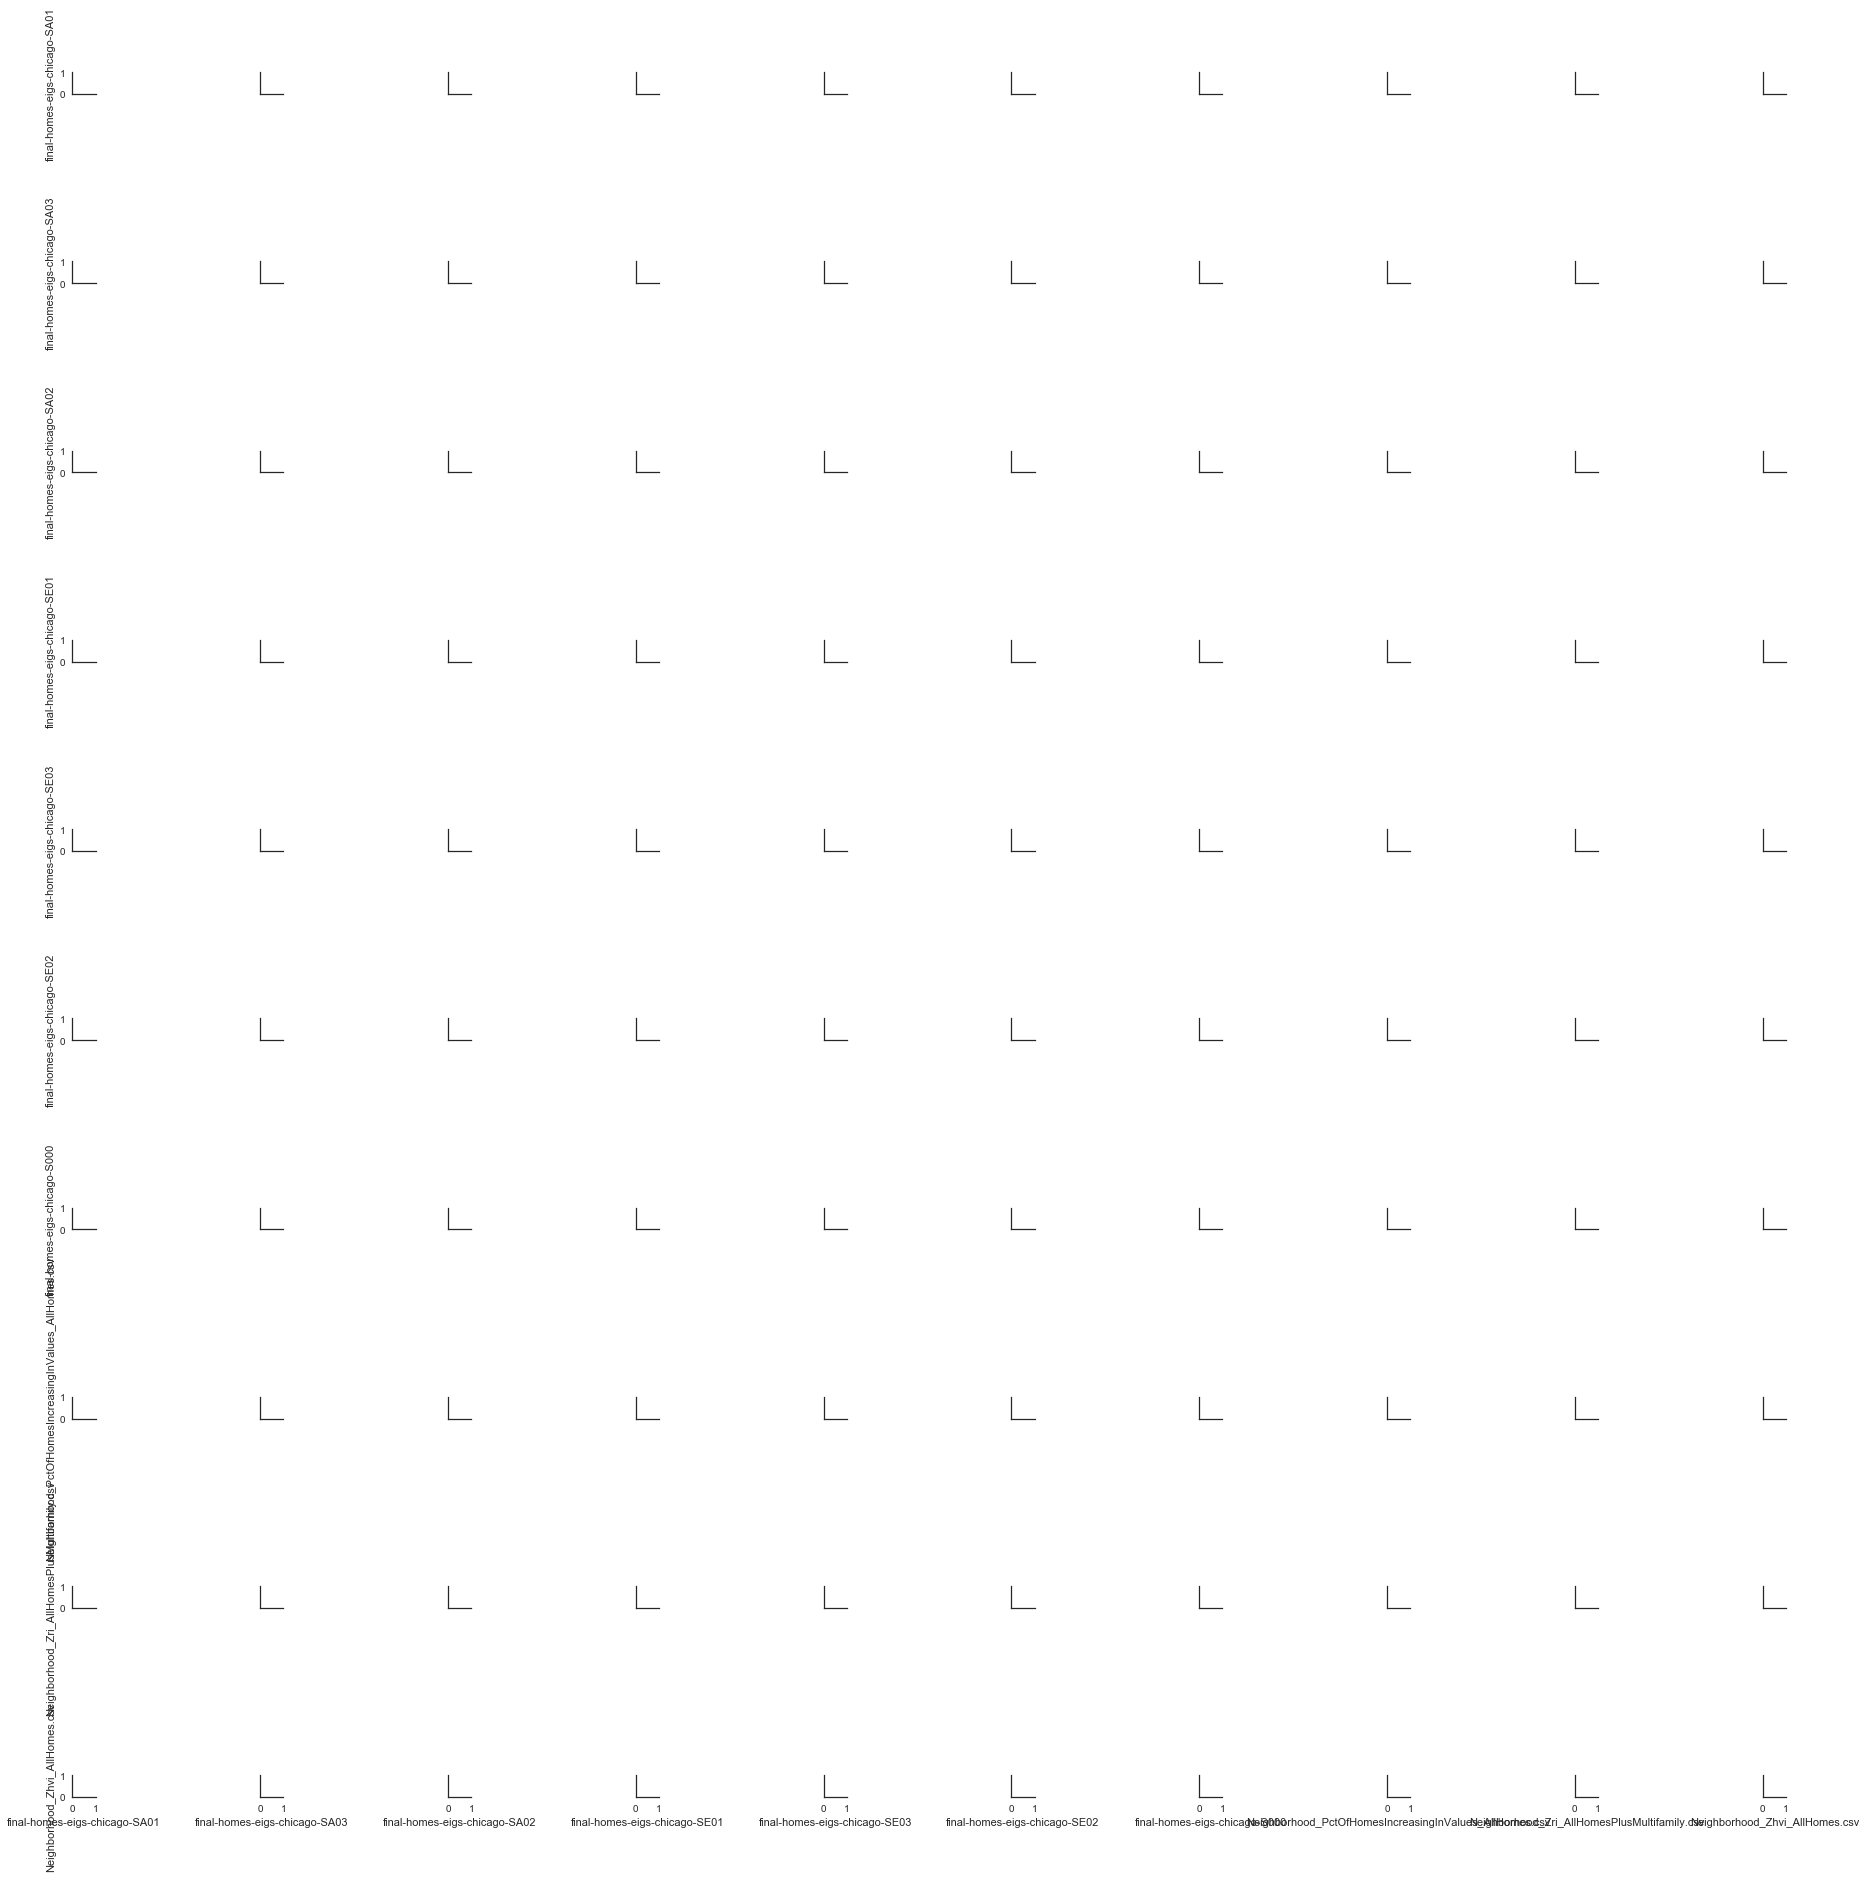

In [8]:
sns.pairplot(corrMatrix)
sns.plt.show()


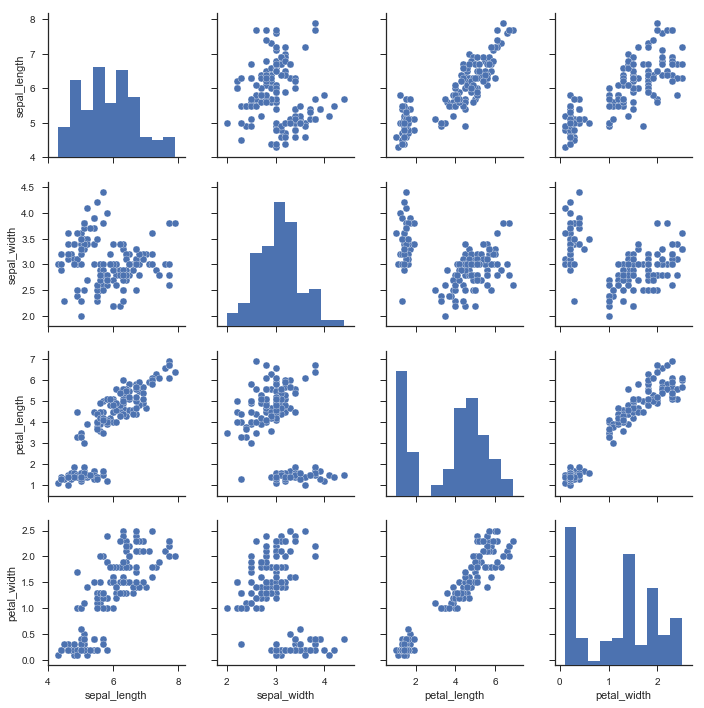

In [72]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris
g = sns.pairplot(iris)

In [24]:
corrMatrix.columns

Index([u'final-homes-eigs-chicago-SA01', u'final-homes-eigs-chicago-SA03',
       u'final-homes-eigs-chicago-SA02', u'final-homes-eigs-chicago-SE01',
       u'final-homes-eigs-chicago-SE03', u'final-homes-eigs-chicago-SE02',
       u'final-homes-eigs-chicago-S000',
       u'Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv',
       u'Neighborhood_Zri_AllHomesPlusMultifamily.csv',
       u'Neighborhood_Zhvi_AllHomes.csv'],
      dtype='object')